In [27]:
# imports, extension loading, gpu check
%load_ext autoreload
%autoreload 2
%autoawait trio
%matplotlib inline

%load_ext tensorboard

import logging
import matplotlib
import matplotlib.pyplot as plt
import IPython

from src.runner import Runner
from src.mock_runner import MockRunner
from src.env import Env
from src.predicting import make_predictor
from src.stats import *

import pandas as pd
from pandas import read_csv
pd.set_option('display.max_rows', 250)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

KB = 1024

import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

from pandas import read_csv, DataFrame
import tensorflow as tf

print("GPUs Available: ", tf.config.list_physical_devices('GPU'))
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
# tf.debugging.set_log_device_placement(False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
grid = Grid()
# grid.workers = ['simple3', 'hard1a', 'hard1b']
grid.methods = ['none', 'ls', 'fs', 'ss', 'dtc', 'lstm']
# grid.workers = ['simple1', 'simple2', 'simple3', 'hard1a', 'hard1a', 'zip', 'wf1']
grid.workers = ['wf1']

def measure(name: str, df: DataFrame, predictor: Base, env: Env):
    runner = MockRunner(df, predictor=predictor, env=env)
    mock_df = runner.run(progress_prefix=name)
    resources = predictor.resources_used()
    mock_df.reindex()
    stats = predictor_stats(mock_df)
    return { **stats, **resources }

grid.measure = measure
results = grid.run()
results.sort_values(['worker', 'method'])
print(results)


 none	simple1	 12850/12850
 none	simple2	 11900/11900
 none	simple3	 12800/12800
 none	hard1a	 38349/38349
 none	hard1a	 38349/38349
 none	zip	 76515/76515
 none	wf1	 4774/4774
 ls	simple1	 12850/12850
 ls	simple2	 11900/11900
 ls	simple3	 12800/12800
 ls	hard1a	 38349/38349
 ls	hard1a	 38349/38349
 ls	zip	 76515/76515
 ls	wf1	 4774/4774
 fs	simple1	 12850/12850
 fs	simple2	 11900/11900
 fs	simple3	 12800/12800
 fs	hard1a	 38349/38349
 fs	hard1a	 38349/38349
 fs	zip	 76515/76515
 fs	wf1	 4774/4774
 ss	simple1	 12850/12850
 ss	simple2	 11900/11900
 ss	simple3	 12800/12800
 ss	hard1a	 38349/38349
 ss	hard1a	 38349/38349
 ss	zip	 76515/76515
 ss	wf1	 4774/4774
 dtc	simple1	 12850/12850
 dtc	simple2	 11900/11900
 dtc	simple3	 12800/12800
 dtc	hard1a	 38349/38349
 dtc	hard1a	 38349/38349
 dtc	zip	 76515/76515
 dtc	wf1	 4774/4774
 lstm	simple1	 12850/12850
 lstm	simple2	 11900/11900
Model: "model_2"
_____________________________________________________________________________________________

In [4]:
results

,worker,method,hit_rate,accuracy,use_rate,time_taken,memory,time
0,simple1,none,0.000000,0.000000,0.000000,1.055065,None,0.000000
1,simple2,none,0.004202,0.000000,0.000000,1.113407,None,0.000000
2,simple3,none,0.124375,0.000000,0.000000,1.068082,None,0.000000
3,hard1a,none,0.003520,0.000000,0.000000,3.363673,None,0.000000
4,hard1a,none,0.003520,0.000000,0.000000,3.104908,None,0.000000
5,zip,none,0.167666,0.000000,0.000000,6.816313,None,0.000000
6,wf1,none,0.876204,0.000000,0.000000,0.401886,None,0.000000
7,simple1,ls,0.979922,0.999921,0.999921,1.060987,198.6K,0.026232
8,simple2,ls,0.424370,0.417327,0.430190,1.086149,122.4K,0.023776
9,simple3,ls,0.918359,0.921490,0.898324,1.129106,117.0K,0.025514


In [5]:
results.to_csv('results_v1')

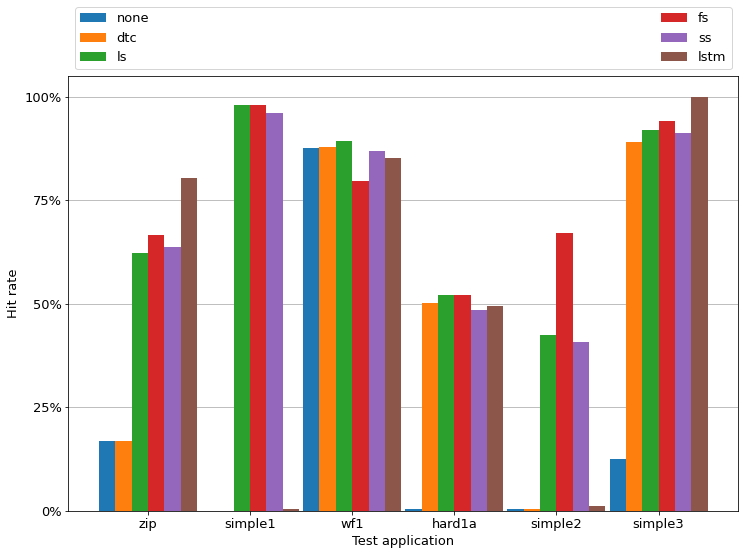

In [32]:
plot_stat_multibar(results, 'hit_rate')

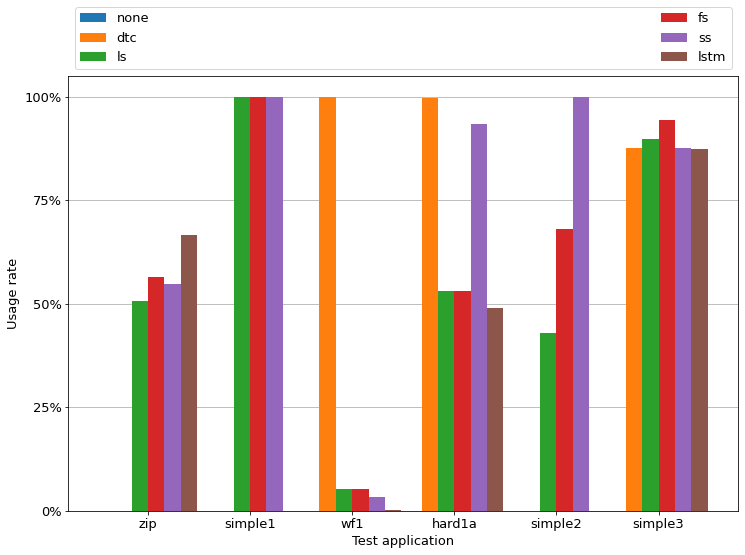

In [35]:
plot_stat_multibar(results, 'use_rate')

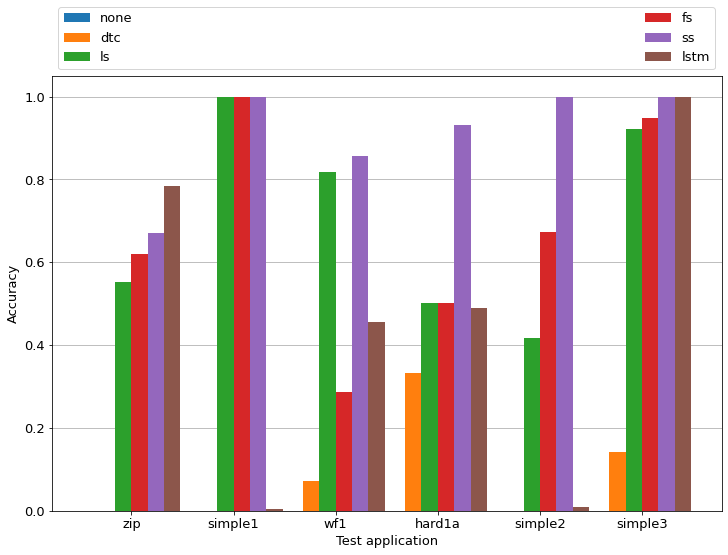

In [38]:
plot_stat_multibar(results, 'accuracy')

<ipython-input-137-d7117c8c782a>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  p, a = plt.subplot()


TypeError: cannot unpack non-iterable AxesSubplot object

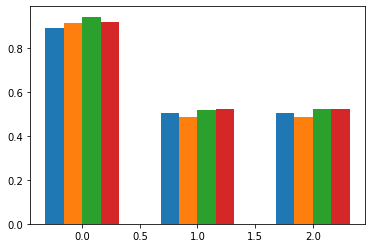

In [138]:
plot_stat('hit_rate')

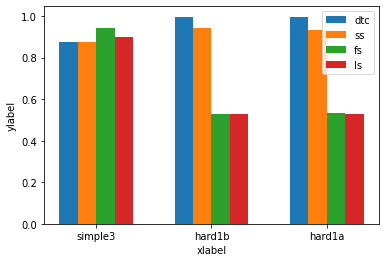

In [131]:
plot_stat('use_rate')

In [ ]:
plot('')